In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
np.random.seed(2021)

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
f = open("E:\\Media, Docs & Programs\\Uni\\Master's\\A comprehensive analysis of EPR - The evolution of two-way understanding between consumers and producers\\04.Analysis&Conclusion\\Code\\Phase ll\\Code\\AllApple.txt")
apple_corpus = f.read()

In [4]:
apple_sent_list = nltk.sent_tokenize(apple_corpus)
apple_sent_list[1:2]

['Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources\nPage 18 Finite Resources\nPage 23 Toxins\nPage 25 Appendix A\nEnvironmental Health and Safety Policy Statement\nPage 26 Appendix B\nCarbon Assurance and Review Statements\nPage 34 Appendix C\nFacilities Emissions: Scope 1, 2, and 3 Carbon Emissions Disclosure\nEnvironmental Responsibility Report | 2015 Progress Report, Covering FYZO14 2\n\n \nWaSteWater at Our Supplier facility in We strive to leave the world better than we found it, and that means considering\nD0¤99¤¤¤» China, l$ treated and tested everything we do—from the design of our products to the processes we use to make\nfor reuse under the guldenee of Our and recycle them.']

In [5]:
apple_df = pd.DataFrame(apple_sent_list)
apple_df = apple_df.rename(columns={0: 'sentence'})
apple_df['company'] = 'apple'
apple_df = apple_df[['company', 'sentence']]
apple_df.head(4)

,company,sentence
0,apple,\nOur micro-hydro project uses the natural dro...
1,apple,Page 3 Environmental Responsibility at Apple\n...
2,apple,Our passion for innovation is also reflected i...
3,apple,Our goal is to make notjust the best products ...


In [6]:
# Load the regular expression library
import re

# Remove punctuation
apple_df['no_punct_sentence'] = apple_df['sentence'].map(lambda x: re.sub('[\!?()#&-_@]', '', x))
apple_df['no_punct_sentence'] = apple_df['no_punct_sentence'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
apple_df['no_punct_sentence'] = apple_df['no_punct_sentence'].map(lambda x: re.sub('\s+', ' ', x))  # remove newline chars
# Convert to lowercase
apple_df['no_punct_sentence'] = apple_df['no_punct_sentence'].map(lambda x: x.lower())
#removing urls
apple_df['no_punct_sentence'] = apple_df['no_punct_sentence'].map(lambda x: re.sub('https?:\/\/.*[\r\n]*', '', x))
apple_df['no_punct_sentence'] = apple_df['no_punct_sentence'].map(lambda x: re.sub('www.*[\r\n]*', '', x))
# Print out the first rows of tweets
apple_df['no_punct_sentence'].head()

0     ur microhydro project uses the natural drops ...
1    age nvironmental esponsibility at pple age lim...
2    ur passion for innovation is also reflected in...
3    ur goal is to make notjust the best products i...
4    pp|e’s nvironmental esponsibility eport coveri...
Name: no_punct_sentence, dtype: object

In [9]:
%%time

#nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet

#removing stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 
                    'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 
                    'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 
                    'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def sent_to_words(sentences):
    for sentence in sentences:
        # sentence = re.sub('\S*@\S*\s?', '', sentence)  # remove emails
        # sentence = re.sub('\s+', ' ', sentence)  # remove newline chars
        # sentence = re.sub("\'", "", sentence)  # remove single quotes
        # these have been applied in previuos steps

        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = apple_df.no_punct_sentence.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
# data_words = remove_stopwords(data_words)
# # print(data_words[:1][0][:30])
print(data_words[:1])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soroush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already

In [10]:
# Build the bigram and trigram models
import spacy

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!


In [11]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           iterations=3000,
                                        #    random_state=100,
                                        #    update_every=1,
                                        #    chunksize=10,
                                        #    passes=10,
                                        #    alpha='symmetric',
                                        #    per_word_topics=True
                                            )

print(lda_model.print_topics())

[(0, '0.037*"datum" + 0.030*"pple" + 0.021*"center" + 0.018*"energy" + 0.013*"power" + 0.013*"water" + 0.013*"renewable" + 0.013*"include" + 0.011*"product" + 0.010*"review"'), (1, '0.014*"work" + 0.014*"employee" + 0.014*"health" + 0.011*"pple" + 0.010*"safety" + 0.010*"nvironmental" + 0.008*"footprint" + 0.008*"free" + 0.008*"carbon" + 0.007*"supplier"'), (2, '0.037*"pple" + 0.036*"emission" + 0.023*"product" + 0.020*"footprint" + 0.017*"cope" + 0.015*"carbon" + 0.015*"fiscal_year" + 0.015*"datum" + 0.013*"fiber" + 0.011*"metric_ton"'), (3, '0.041*"eport" + 0.035*"energy" + 0.030*"facility" + 0.026*"pple" + 0.016*"water" + 0.014*"renewable" + 0.014*"product" + 0.013*"rogress" + 0.012*"nvironmental" + 0.009*"emission"'), (4, '0.024*"pple" + 0.022*"supplier" + 0.016*"safety" + 0.016*"environmental" + 0.013*"information" + 0.012*"health" + 0.011*"program" + 0.011*"process" + 0.009*"percent" + 0.009*"product"'), (5, '0.034*"material" + 0.025*"product" + 0.016*"pple" + 0.012*"device" + 0.

In [12]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str('5_apple'))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str('5_apple') +'.html')
LDAvis_prepared

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.066233  0.081599       1        1  27.086784
3     -0.070345 -0.049297       2        1  15.478660
2     -0.116865 -0.177813       3        1  15.377450
5      0.073919  0.096471       4        1  12.198855
0     -0.102176  0.127791       5        1  10.609008
4      0.095567 -0.019225       6        1  10.552013
1      0.186134 -0.059527       7        1   8.697229, topic_info=            Term         Freq        Total Category  logprob  loglift
18         eport   678.000000   678.000000  Default  30.0000  30.0000
66        energy  1851.000000  1851.000000  Default  29.0000  29.0000
103     emission   743.000000   743.000000  Default  28.0000  28.0000
1          datum   908.000000   908.000000  Default  27.0000  27.0000
74      material   625.000000   625.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
37       product    51.630947  1320.484845   Topic7  -5.0019  -0.7995
1352       scope    35.884573   157.461677   Topic7  -5.3658   0.9633
18         eport    39.253633   678.624702   Topic7  -5.2760  -0.4079
598   management    33.656282   250.196181   Topic7  -5.4299   0.4361
126      protect    32.718789   174.722919   Topic7  -5.4581   0.7669

[520 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3523      6  0.936229    academic
3523      7  0.052013    academic
3968      1  0.080012  accurately
3968      5  0.880129  accurately
10        1  0.009160    acilitie
...     ...       ...         ...
276       3  0.099531        year
276       4  0.011059        year
276       5  0.149296        year
276       6  0.038706        year
276       7  0.024883        year

[1195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 3, 6, 1, 5, 2])

In [13]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.5611,"datum, pple, center, energy, power, water, ren...","[project, natural, drop, elevation, eschute, h..."
1,1,3.0,0.9392,"eport, energy, facility, pple, water, renewabl...","[pple, age, limate_hange, age, enewable, esour..."
2,2,1.0,0.8774,"work, employee, health, pple, safety, nvironme...","[passion, innovation, reflect, lean_at, enviro..."
3,3,3.0,0.8770,"eport, energy, facility, pple, water, renewabl...","[goal, notjust, product, world, product, world]"
4,4,0.0,0.6595,"datum, pple, center, energy, power, water, ren...","[pp, eport, cover, fiscal_year, highlight, pro..."
5,5,6.0,0.6688,"energy, renewable, project, percent, product, ...","[set, priority, believe, pple, impact, educe, ..."
6,6,0.0,0.5713,"datum, pple, center, energy, power, water, ren...",[thrive]
7,7,2.0,0.8566,"pple, emission, product, footprint, cope, carb...","[ioneer, ofgreener, material, product, process]"
8,8,0.0,0.9046,"datum, pple, center, energy, power, water, ren...","[report, detail, approach, priority, highlight..."
9,9,0.0,0.9340,"datum, pple, center, energy, power, water, ren...","[starter, data, center, power, entirely, clean..."


In [14]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9713,"datum, pple, center, energy, power, water, renewable, include, product, review","[se, uclear, oal, enewable, reenow, mission, efault_rid, mission, pple, uke_nergy, supplement, g..."
1,1.0,0.9642,"work, employee, health, pple, safety, nvironmental, footprint, free, carbon, supplier","[ur, work, lead, isa_ackson, ice_resident, nvironmental, nitiative, pm, uc, excee, energy, lency..."
2,2.0,0.9907,"pple, emission, product, footprint, cope, carbon, fiscal_year, datum, fiber, metric_ton","[indings_verifie, pple, eptember, rotocol, atural, onsumption, pple, urchase, invoice, uantitie,..."
3,3.0,0.9807,"eport, energy, facility, pple, water, renewable, product, rogress, nvironmental, emission","[ssociate, eiko, dvance, anufactory, henghe, esource, ncorporate, olvay, lectronic, nternational..."
4,4.0,0.9777,"pple, supplier, safety, environmental, information, health, program, process, percent, product","[afer, leaner, hemical, anagement, ate, campaign, enrol, percent, ver, supplier, facility, afer,..."
5,5.0,0.9774,"material, product, pple, device, impact, chemical, safe, water, part, program","[well, understand, impact, program, entire, recycling, chain, work, ewaste, expert, calculate, r..."
6,6.0,0.9747,"energy, renewable, project, percent, product, new, pple, create, reduce, facility","[nergy, eneration, urchase, enewable, important, first, step, feasible, produce, manage, electri..."


In [15]:
apple_result = pd.concat([apple_df, df_dominant_topic], axis=1)
apple_result.head(4)

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,apple,\nOur micro-hydro project uses the natural drops in elevation along the Deschutes River to help ...,ur microhydro project uses the natural drops in elevation along the eschutes iver to help power...,0,0.0,0.5611,"datum, pple, center, energy, power, water, renewable, include, product, review","[project, natural, drop, elevation, eschute, help, power, rineville_regon, datum, center]"
1,apple,Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources...,age nvironmental esponsibility at pple age limate hange age enewable esources age inite esources...,1,3.0,0.9392,"eport, energy, facility, pple, water, renewable, product, rogress, nvironmental, emission","[pple, age, limate_hange, age, enewable, esource, age, inite, esource, age, oxin, age, ppendix, ..."
2,apple,Our passion for innovation is also reflected in how we think about\nClean Water Pf°gfem‘ environ...,ur passion for innovation is also reflected in how we think about lean ater f°gfem‘ environmenta...,2,1.0,0.8774,"work, employee, health, pple, safety, nvironmental, footprint, free, carbon, supplier","[passion, innovation, reflect, lean_at, environmental, responsibility]"
3,apple,"Our goal is to make notjust the best products in the world,\nbut the best products for the world.",ur goal is to make notjust the best products in the world but the best products for the world,3,3.0,0.8770,"eport, energy, facility, pple, water, renewable, product, rogress, nvironmental, emission","[goal, notjust, product, world, product, world]"


In [20]:
g = open("E:\\Media, Docs & Programs\\Uni\\Master's\\Article\\Analysis\\Phasell\\Code\\AllSamsung.txt")
samsung_corpus = g.read()

In [21]:
samsung_sent_list = nltk.sent_tokenize(samsung_corpus)
samsung_sent_list[1:2]

['Looking back on our 38-year history of marathon developments, we have achieved\nglobal presence and high reputation.']

In [22]:
samsung_df = pd.DataFrame(samsung_sent_list)

In [23]:
samsung_df = samsung_df.rename(columns={0: 'sentence'})

In [24]:
samsung_df['company'] = 'samsung'
samsung_df = samsung_df[['company', 'sentence']]
samsung_df.head(4)

,company,sentence
0,samsung,\n \n-;_ _ ‘\n\nContents\nCEO Message 02\nIntroduction 04\nNlaterial Sustainability I...
1,samsung,"Looking back on our 38-year history of marathon developments, we have achieved\nglobal presence ..."
2,samsung,"Thus, we believe it is high time we share our sustainability\nendeavors in the past year with va..."
3,samsung,We have prepared this report using the G3 Guidelines of GRI (Global Reporting Initiative).


In [25]:
# Remove punctuation
samsung_df['no_punct_sentence'] = samsung_df['sentence'].map(lambda x: re.sub('[\!?()#&-_@]', '', x))
samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: re.sub('\s+', ' ', x))  # remove newline chars
# Convert to lowercase
samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: x.lower())
#removing urls
samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: re.sub('https?:\/\/.*[\r\n]*', '', x))
samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: re.sub('www.*[\r\n]*', '', x))
# Print out the first rows of tweets
samsung_df['no_punct_sentence'].head()

<>:2: DeprecationWarning: invalid escape sequence \!
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \/
<>:2: DeprecationWarning: invalid escape sequence \!
<>:3: DeprecationWarning: invalid escape sequence \S
<>:4: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \/
C:\Users\Soroush\AppData\Local\Temp/ipykernel_8172/620955427.py:2: DeprecationWarning: invalid escape sequence \!
  samsung_df['no_punct_sentence'] = samsung_df['sentence'].map(lambda x: re.sub('[\!?()#&@]', '', x))
C:\Users\Soroush\AppData\Local\Temp/ipykernel_8172/620955427.py:3: DeprecationWarning: invalid escape sequence \S
  samsung_df['no_punct_sentence'] = samsung_df['no_punct_sentence'].map(lambda x: re.sub('\S*@\S*\s?', '', x)) #emails
C:\Users\Soroush\AppData\Local\Temp/ipykernel_8172/620955427.py:4: DeprecationWarning: invalid escape sequence \s
  samsung_df[

0     -;_ _ ‘ contents ceo message 02 introduction 04 nlaterial sustainability issues for samsung ele...
1    looking back on our 38-year history of marathon developments, we have achieved global presence a...
2    thus, we believe it is high time we share our sustainability endeavors in the past year with var...
3               we have prepared this report using the g3 guidelines of gri global reporting initiative.
4    we disclosed the company profiles as well as economic, environmental, and social performance ind...
Name: no_punct_sentence, dtype: object

In [26]:
data = samsung_df.no_punct_sentence.values.tolist()
data_words_samsung = list(sent_to_words(data))
# remove stop words
# data_words = remove_stopwords(data_words)
# # print(data_words[:1][0][:30])
print(data_words_samsung[:1])

[['contents', 'ceo', 'message', 'introduction', 'nlaterial', 'sustainability', 'issues', 'for', 'samsung', 'electronics', 'appendix', 'about', 'this', 'report', 'we', 'are', 'publishing', 'our', 'first', 'sustainability', 'report', 'as', 'upgraded', 'effort', 'from', 'the', 'past', 'environmental', 'and', 'social', 'reports']]


In [27]:
# Build the bigram and trigram models
import spacy

bigram_samsung = gensim.models.Phrases(data_words_samsung, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram_samsung = gensim.models.Phrases(bigram_samsung[data_words_samsung], threshold=100)  
bigram_mod_samsung = gensim.models.phrases.Phraser(bigram_samsung)
trigram_mod_samsung = gensim.models.phrases.Phraser(trigram_samsung)

data_ready_samsung = process_words(data_words_samsung)  # processed Text Data!


In [28]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create Dictionary
id2word_samsung = corpora.Dictionary(data_ready_samsung)

# Create Corpus: Term Document Frequency
corpus_samsung = [id2word.doc2bow(text) for text in data_ready_samsung]

# Build LDA model
lda_model_samsung = gensim.models.ldamodel.LdaModel(corpus=corpus_samsung,
                                           id2word=id2word_samsung,
                                           num_topics=7, 
                                           iterations=3000,
                                        #    random_state=100,
                                        #    update_every=1,
                                        #    chunksize=10,
                                        #    passes=10,
                                        #    alpha='symmetric',
                                        #    per_word_topics=True
                                            )

print(lda_model_samsung.print_topics())

[(0, '0.018*"tau" + 0.015*"thus" + 0.015*"enzo" + 0.012*"iiii" + 0.012*"field" + 0.011*"technology" + 0.011*"shock" + 0.010*"qualitative" + 0.010*"range" + 0.009*"component"'), (1, '0.019*"phthalate" + 0.018*"creativity" + 0.015*"feature" + 0.014*"high" + 0.012*"wednesdayas" + 0.011*"various" + 0.010*"block" + 0.010*"machine" + 0.009*"ofglobaldata" + 0.007*"article"'), (2, '0.029*"policy" + 0.024*"input" + 0.018*"credibility" + 0.011*"soo" + 0.010*"nlaterial" + 0.009*"prefer" + 0.008*"technology" + 0.008*"raw" + 0.008*"gri_index" + 0.007*"neighbor"'), (3, '0.034*"company" + 0.013*"tau" + 0.011*"container" + 0.011*"interest" + 0.010*"continuous" + 0.008*"consolidate" + 0.008*"reportingihe" + 0.007*"respective" + 0.007*"leader" + 0.007*"component"'), (4, '0.036*"development" + 0.032*"input" + 0.023*"meanwhile" + 0.019*"feature" + 0.017*"global" + 0.016*"compliance" + 0.015*"consolidate" + 0.014*"figure" + 0.014*"time" + 0.013*"plate"'), (5, '0.031*"elv" + 0.017*"kind" + 0.013*"illlii" + 

In [29]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str('5_samsung'))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared_samsung = pyLDAvis.gensim_models.prepare(lda_model_samsung, corpus_samsung, id2word_samsung)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared_samsung, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared_samsung = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared_samsung, './results/ldavis_prepared_'+ str('5_samsung') +'.html')
LDAvis_prepared_samsung

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.164752  0.000620       1        1  33.755038
0     -0.083198  0.055433       2        1  14.840826
3     -0.085094 -0.003626       3        1  13.906295
2     -0.089969  0.086467       4        1  13.333463
4      0.049815 -0.190836       5        1  12.847988
1      0.141787 -0.107910       6        1   7.143758
5      0.231411  0.159852       7        1   4.172631, topic_info=             Term         Freq        Total Category  logprob  loglift
17    development   918.000000   918.000000  Default  30.0000  30.0000
39        company  1650.000000  1650.000000  Default  29.0000  29.0000
28          input  1820.000000  1820.000000  Default  28.0000  28.0000
760        policy   988.000000   988.000000  Default  27.0000  27.0000
50        feature   703.000000   703.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
56       relevant    63.326202   629.730663   Topic7  -4.8557   0.8796
176    philosophy    50.546563   424.903812   Topic7  -5.0811   1.0477
470        former    44.710931   288.724937   Topic7  -5.2038   1.3114
1499        cause    39.788792   232.729387   Topic7  -5.3204   1.4103
100       delight    38.392486   602.496073   Topic7  -5.3562   0.4234

[505 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
857       3  0.982889        able
15        1  0.238306     achieve
15        2  0.246524     achieve
15        3  0.088338     achieve
15        4  0.267067     achieve
...     ...       ...         ...
7835      6  0.991562  withoutthe
5350      1  0.988208     woikpim
25        3  0.929581        year
25        6  0.051643        year
1558      5  0.976068       young

[1263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 4, 3, 5, 2, 6])

In [30]:
df_topic_sents_keywords_samsung = format_topics_sentences(ldamodel=lda_model_samsung, corpus=corpus_samsung, texts=data_ready_samsung)

# Format
df_dominant_topic_samsung = df_topic_sents_keywords_samsung.reset_index()
df_dominant_topic_samsung.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_samsung.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4324,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[content, ceo, message, introduction, nlaterial, sustainability, issue, appendix, report, publis..."
1,1,0.0,0.9140,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[look, back, year, history, marathon, development, achieve, global, presence, high, reputation]"
2,2,6.0,0.2844,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[thus, believe, high, time, share, sustainability, endeavor, year, various, stakeholder, listen,..."
3,3,3.0,0.5732,"company, tau, container, interest, continuous, consolidate, reportingihe, respective, leader, co...","[prepare, report, guideline, gri]"
4,4,2.0,0.5631,"policy, input, credibility, soo, nlaterial, prefer, technology, raw, gri_index, neighbor","[disclose, company, profile, well, economic, environmental, social, ensure, full, sharing, infor..."
5,5,0.0,0.5484,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[new, feature, report, gri_index, table, page, help, reader, understand, report, coverage, relev..."
6,6,0.0,0.3944,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[financial, datum, include, report, basically, consolidate, figure, encompass, performance, subs..."
7,7,0.0,0.7594,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[environmental, social, performance, information, consolidate, include, performance, overseas, s..."
8,8,6.0,0.7849,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[footnote, datum, pertain, performance, headquarters]"
9,9,0.0,0.6351,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[continue, strengthen, data, collect, process, expand, scope, report]"


In [31]:
df_dominant_topic_samsung.head(4)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4324,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[content, ceo, message, introduction, nlaterial, sustainability, issue, appendix, report, publis..."
1,1,0.0,0.9140,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[look, back, year, history, marathon, development, achieve, global, presence, high, reputation]"
2,2,6.0,0.2844,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[thus, believe, high, time, share, sustainability, endeavor, year, various, stakeholder, listen,..."
3,3,3.0,0.5732,"company, tau, container, interest, continuous, consolidate, reportingihe, respective, leader, co...","[prepare, report, guideline, gri]"


In [32]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet_samsung = pd.DataFrame()
sent_topics_outdf_grpd_samsung = df_topic_sents_keywords_samsung.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd_samsung:
    sent_topics_sorteddf_mallet_samsung = pd.concat([sent_topics_sorteddf_mallet_samsung, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet_samsung.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet_samsung.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet_samsung.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9951,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[economic, value, creation, operational, structure, ofthe, location, organization, headquarters,..."
1,1.0,0.9779,"phthalate, creativity, feature, high, wednesdayas, various, block, machine, ofglobaldata, article","[agenda, item, include, approval, quarter, report, fiscal, year, approve, agenda, item, include,..."
2,2.0,0.9512,"policy, input, credibility, soo, nlaterial, prefer, technology, raw, gri_index, neighbor","[pr, violation, label, pr, practice, relate, customer, satisfaction, include, result, suwey, mea..."
3,3.0,0.9817,"company, tau, container, interest, continuous, consolidate, reportingihe, respective, leader, co...","[disclosure, item, piwei, response, page, labor, practice, decent, work, disclosure, management,..."
4,4.0,0.9946,"development, input, meanwhile, feature, global, compliance, consolidate, figure, time, plate","[habitat, area, affect, operation, level, extinction, nsk, insumem, dam, total, direct, indirect..."
5,5.0,0.9610,"elv, kind, illlii, ifs, equipment, productivity, adnrrraarrdn, decision, evaluate, relevant","[interest, income, interest, expense, unit, interest, income, interest, expense, net, interest, ..."
6,6.0,0.9906,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[implement, representative, contribution, project, support, youth, realize, dream, support, chil..."


In [33]:
samsung_result = pd.concat([samsung_df, df_dominant_topic_samsung], axis=1)

In [34]:
samsung_result.head(4)

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,samsung,\n \n-;_ _ ‘\n\nContents\nCEO Message 02\nIntroduction 04\nNlaterial Sustainability I...,-;_ _ ‘ contents ceo message 02 introduction 04 nlaterial sustainability issues for samsung ele...,0,0.0,0.4324,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[content, ceo, message, introduction, nlaterial, sustainability, issue, appendix, report, publis..."
1,samsung,"Looking back on our 38-year history of marathon developments, we have achieved\nglobal presence ...","looking back on our 38-year history of marathon developments, we have achieved global presence a...",1,0.0,0.9140,"tau, thus, enzo, iiii, field, technology, shock, qualitative, range, component","[look, back, year, history, marathon, development, achieve, global, presence, high, reputation]"
2,samsung,"Thus, we believe it is high time we share our sustainability\nendeavors in the past year with va...","thus, we believe it is high time we share our sustainability endeavors in the past year with var...",2,6.0,0.2844,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[thus, believe, high, time, share, sustainability, endeavor, year, various, stakeholder, listen,..."
3,samsung,We have prepared this report using the G3 Guidelines of GRI (Global Reporting Initiative).,we have prepared this report using the g3 guidelines of gri global reporting initiative.,3,3.0,0.5732,"company, tau, container, interest, continuous, consolidate, reportingihe, respective, leader, co...","[prepare, report, guideline, gri]"


In [35]:
results = pd.concat([apple_result, samsung_result], axis=0)

In [36]:
results.head(4)

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,apple,\nOur micro-hydro project uses the natural drops in elevation along the Deschutes River to help ...,our micro-hydro project uses the natural drops in elevation along the deschutes river to help p...,0,2.0,0.9139,"environmental, product, create, page, material, safe, management, safety, datum, recycling","[project, natural, drop, elevation, deschute, river, help, power, datum]"
1,apple,Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources...,page 3 environmental responsibility at apple page 4 climate change page 11 renewable resources p...,1,2.0,0.5629,"environmental, product, create, page, material, safe, management, safety, datum, recycling","[page, environmental, responsibility, apple, page, climate_change, page, renewable, resource, pa..."
2,apple,Our passion for innovation is also reflected in how we think about\nClean Water Pf°gfem‘ environ...,our passion for innovation is also reflected in how we think about clean water pf°gfem‘ environm...,2,5.0,0.8925,"report, environmental, energy, responsibility, progress, renewable, apple, safety, project, health","[passion, innovation, reflect, clean, water, environmental, responsibility]"
3,apple,"Our goal is to make notjust the best products in the world,\nbut the best products for the world.","our goal is to make notjust the best products in the world, but the best products for the world.",3,3.0,0.8769,"apple, employee, energy, percent, product, facility, lease, less, work, commute","[goal, notjust, product, world, product, world]"


In [37]:
results.tail(4)

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
23093,samsung,"Please referto P65, 92\nand 95 ofthe Sustainability Report for Samsung Electron-\nics’ efforts i...","please referto p65, 92 and 95 ofthe sustainability report for samsung electron- ics’ efforts in ...",23093,1.0,0.8771,"phthalate, creativity, feature, high, wednesdayas, various, block, machine, ofglobaldata, article","[referto, sustainability, report, effort, manage, hazardous, substance]"
23094,samsung,"TC-HW-me-2 Percehfaqe Ofeliqible products, by revehue preeumypee ¤/Oereeiee ereii cpm registered...","tc-hw-me-2 percehfaqe ofeliqible products, by revehue preeumypee ¤/oereeiee ereii cpm registered...",23094,5.0,0.3474,"elv, kind, illlii, ifs, equipment, productivity, adnrrraarrdn, decision, evaluate, relevant","[percehfaqe, ofeliqible, product, revehue, oereeiee, ereii, cpm, register, product, meet, epeat,..."
23095,samsung,..............................................................................\nComputers 53.i%\...,.............................................................................. computers 53.i% t...,23095,6.0,0.2728,"meanwhile, spotlight, prefer, tau, tie, comprise, pq, submission, company, qualitative","[computer, prod, byrgl, producttype, ofsale, gualifie, meeting, energy, star, criterion, product..."
23096,samsung,"Moreover, this report is printed with soy inks that can help reduce emissions causing air pollut...","moreover, this report is printed with soy inks that can help reduce emissions causing air pollut...",23096,4.0,0.5779,"development, input, meanwhile, feature, global, compliance, consolidate, figure, time, plate","[moreover, report, print, soy, ink, help, reduce, emission, cause, air, pollution, smvisun]"


In [38]:
# results.to_csv('samsung_apple_reports_topics_together.csv')

In [39]:
topic_counts = results.groupby('Dominant_Topic')['no_punct_sentence'].count()

In [40]:
topic_counts

Dominant_Topic
0.0    13302
1.0     2342
2.0     2955
3.0     3058
4.0     3269
5.0     1611
6.0     8030
Name: no_punct_sentence, dtype: int64

In [41]:
topic_counts = pd.DataFrame(topic_counts).reset_index()
topic_counts

,Dominant_Topic,no_punct_sentence
0,0.0,13302
1,1.0,2342
2,2.0,2955
3,3.0,3058
4,4.0,3269
5,5.0,1611
6,6.0,8030


<AxesSubplot:title={'center':'Frequency of topics between tweets\n\n'}, xlabel='Dominant_Topic', ylabel='no_punct_sentence'>

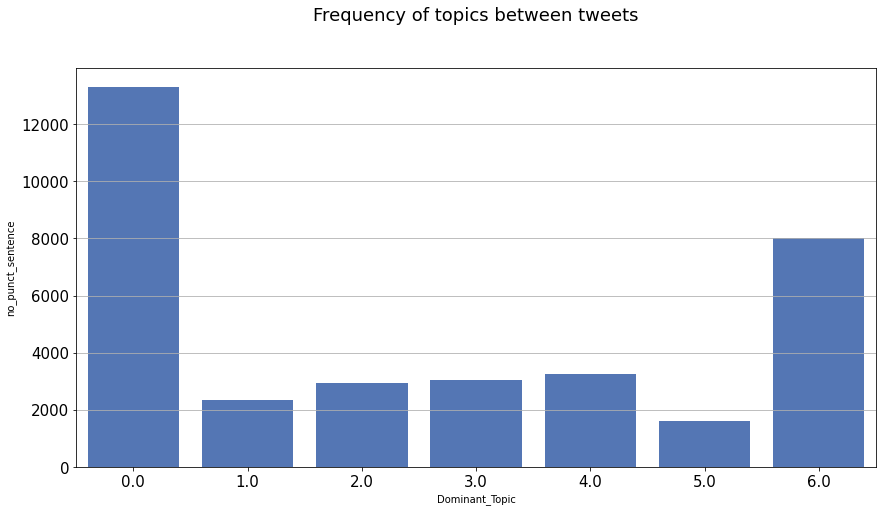

In [42]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between tweets\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')

# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=topic_counts, x='Dominant_Topic', y='no_punct_sentence', color='#4472c4')

In [47]:
results.head(4)

,company,sentence,no_punct_sentence,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,apple,\nOur micro-hydro project uses the natural drops in elevation along the Deschutes River to help ...,our micro-hydro project uses the natural drops in elevation along the deschutes river to help p...,0,2.0,0.9139,"environmental, product, create, page, material, safe, management, safety, datum, recycling","[project, natural, drop, elevation, deschute, river, help, power, datum]"
1,apple,Page 3 Environmental Responsibility at Apple\nPage 4 Climate Change\nPage 11 Renewable Resources...,page 3 environmental responsibility at apple page 4 climate change page 11 renewable resources p...,1,2.0,0.5629,"environmental, product, create, page, material, safe, management, safety, datum, recycling","[page, environmental, responsibility, apple, page, climate_change, page, renewable, resource, pa..."
2,apple,Our passion for innovation is also reflected in how we think about\nClean Water Pf°gfem‘ environ...,our passion for innovation is also reflected in how we think about clean water pf°gfem‘ environm...,2,5.0,0.8925,"report, environmental, energy, responsibility, progress, renewable, apple, safety, project, health","[passion, innovation, reflect, clean, water, environmental, responsibility]"
3,apple,"Our goal is to make notjust the best products in the world,\nbut the best products for the world.","our goal is to make notjust the best products in the world, but the best products for the world.",3,3.0,0.8769,"apple, employee, energy, percent, product, facility, lease, less, work, commute","[goal, notjust, product, world, product, world]"


In [56]:
results['sentence'].nunique()

29891

In [60]:
topic_counts_company = pd.DataFrame(results.groupby(['Dominant_Topic', 'company'])['sentence'].count()).reset_index()

In [61]:
topic_counts_company

,Dominant_Topic,company,sentence
0,0.0,apple,3796
1,0.0,samsung,9506
2,1.0,apple,1399
3,1.0,samsung,943
4,2.0,apple,949
5,2.0,samsung,2006
6,3.0,apple,988
7,3.0,samsung,2070
8,4.0,apple,1396
9,4.0,samsung,1873


<AxesSubplot:title={'center':'Frequency of topics between tweets\n\n'}, xlabel='company', ylabel='sentence'>

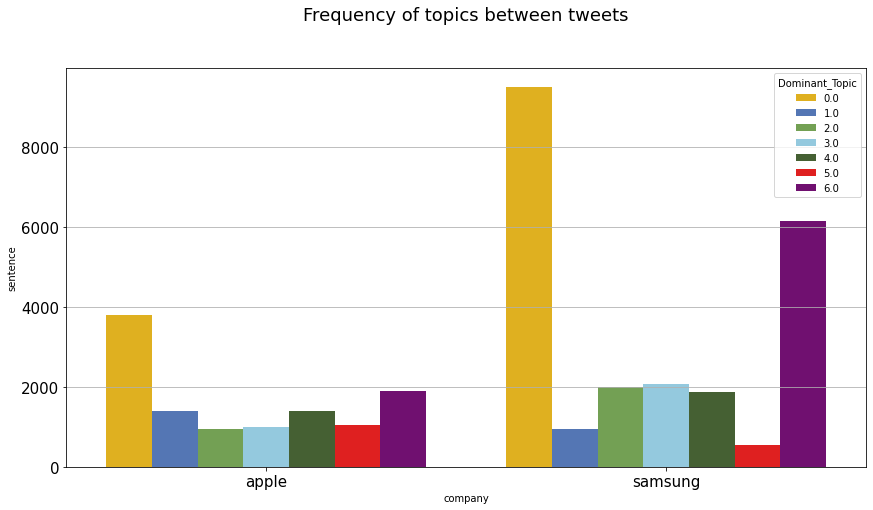

In [71]:
fig, ax = plt.subplots(figsize = (12,7))
ax.tick_params(axis='both', labelsize=15)

# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

ax.set_title('Frequency of topics between tweets\n\n', size = 18)

plt.tight_layout()
ax.grid(axis='y')

# sns.barplot(data=df_freq, y='Keywords', x='Frequency', color='#4472c4')
sns.barplot(data=pd.DataFrame(topic_counts_company).reset_index(), 
                        y='sentence', x='company', hue='Dominant_Topic' , color='blue', palette=["#ffc000", "#4472c4", "#70ad47", "skyblue", "#43682b", "red", 'purple'])

In [85]:
topic_counts_company

,Dominant_Topic,company,sentence
0,0.0,apple,3796
1,0.0,samsung,9506
2,1.0,apple,1399
3,1.0,samsung,943
4,2.0,apple,949
5,2.0,samsung,2006
6,3.0,apple,988
7,3.0,samsung,2070
8,4.0,apple,1396
9,4.0,samsung,1873


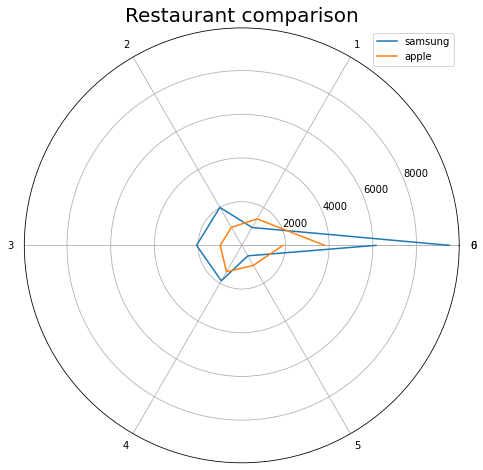

In [113]:
import numpy as np
import matplotlib.pyplot as plt

apple = topic_counts_company[topic_counts_company['company'] == 'apple']
samsung = topic_counts_company[topic_counts_company['company'] == 'samsung']
samsung = samsung.reset_index()
samsung = samsung.drop('index', axis=1)
apple = apple.reset_index()
apple = apple.drop('index', axis=1)

categories = [0, 1, 2, 3, 4, 5, 6]
company_1 = []
company_1 = samsung.sentence
company_2 = apple.sentence

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(company_1))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, company_1, label='samsung')
plt.plot(label_loc, company_2, label='apple')
plt.title('Restaurant comparison', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

In [125]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['1', '2', '3', '4', '5', '6', '7']
categories = [*categories, categories[0]]

restaurant_1 = [3796, 1399, 949, 988, 1396, 1057, 1885]
restaurant_2 = [9506, 943, 2006, 2070, 1873, 554, 6145]

restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Restaurant 1'),
        go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='Restaurant 2'),
        # go.Scatterpolar(r=restaurant_3, theta=categories, fill='toself', name='Restaurant 3')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)


'temp-plot.html'